# Set the NOMAD Upload id
- Use the doi to find the nomad dataset
- go to the entry page
- copy the Uplaod id and paste it here

In [1]:
upload_id = 'l5kdaKgST2OPUNieoYycxw'

# Kerr-microscopy example dataset
## Introduction
Kerr microscopy measurement of an as-transformed $\tau-(\mathrm{Mn}_{53}\mathrm{Al}_{45}\mathrm{C}_2)_{99.4}\mathrm{Ni}_{0.6}$-sample, homogenization at 1100°C for 120 min, then cooled in air inside the quartz-glass ampule, in order to obtain the tau-phase. Field was applied in-plane. Contrast was selected for in plane components of magnetic domains.

The measurement was saved in an HDF5-file.
## Data analysis
First, we need to import some libraries to handle and plot the data.

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import requests
from io import BytesIO
import zipfile
import os
# dataDir = 'IFW_Kerr-Microscopy_RawData/'

In [21]:
url = f'https://nomad-lab.eu/prod/v1/api/v1/uploads/{upload_id}/raw/IFW_Kerr-Microscopy_RawData/MnAl22450.hdf5?compress=true'
local_zip_path = 'MnAl22450.zip'
if not os.path.isfile('MnAl22450.hdf5'):
  if not os.path.isfile(local_zip_path):
    with requests.get(url, stream=True) as response:
      response.raise_for_status()
      with open(local_zip_path, 'wb') as f:
        for chunk in response.iter_content(chunk_size=8192):
            f.write(chunk)

In [22]:
if not os.path.isfile('MnAl22450.hdf5'):
  with zipfile.ZipFile(local_zip_path, 'r') as zf:
    zf.extractall('.')  # Or your desired path

In [23]:
data = h5py.File('MnAl22450.hdf5', 'r')

Now we can access the measurement data. For example, we can plot a raw image and a difference image at some magnetic field strength.

Text(5, 5, 'H = -286 mT')

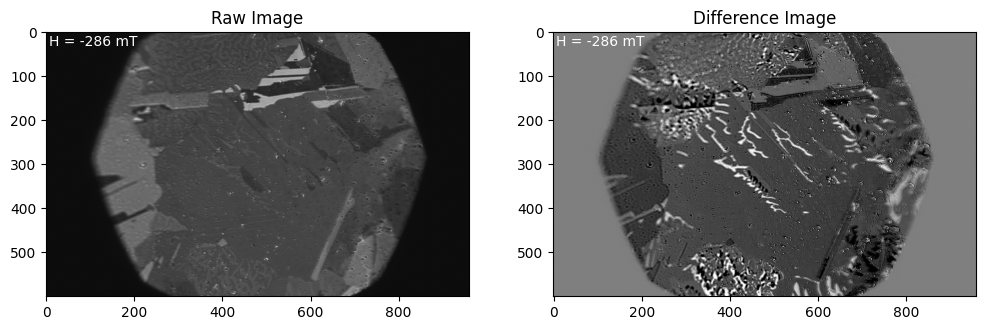

In [24]:
imgnum = 123

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.imshow(data['Data/MOKE/RAW'][imgnum], cmap='gray')
ax1.set_title('Raw Image')
ax2.imshow(data['Data/MOKE/DIFF'][imgnum], cmap='gray')
ax2.set_title('Difference Image')
ax1.text(5, 5, f'H = {data['Data/MOKE/Magnetic Field'][imgnum]:.0f} mT', va='top', ha='left', color='white')
ax2.text(5, 5, f'H = {data['Data/MOKE/Magnetic Field'][imgnum]:.0f} mT', va='top', ha='left', color='white')

We can also plot the systeresis of the gray levels over their respective magnetic field.

Text(0, 0.5, 'Gray level')

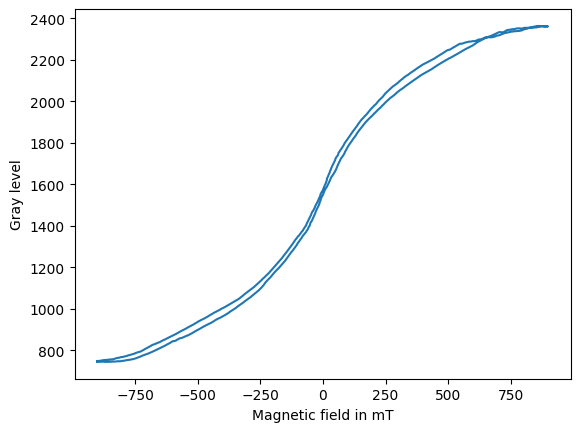

In [25]:
fig, ax = plt.subplots()

ax.plot(data['Data/MOKE/Magnetic Field'][:], data['Data/MOKE/Gray Level'][:])
ax.set_xlabel('Magnetic field in mT')
ax.set_ylabel('Gray level')